In [121]:
import sys
sys.path.append('../../process')
import psml
import imp
import numpy as np
import imp

In [122]:
trace_dir = 'traces/'

In [123]:
imp.reload(psml)
#Load all for loop traces into one 3d array.
trc_paths = !ls traces/*
trcs = psml.paths_to_tracearr(trc_paths, 'act')
trcs.shape

(1, 2639, 5)

In [124]:
#Read events
t0 = trcs[0]
#% 8 for Lower 3 bits = id. id = 1 and 3 are read events
rd_events = ((t0[:,0] % 8) == 1) | ((t0[:,0] % 8) == 3)
rd_events.sum()

1839

In [125]:
#Write events
#% 8 for Lower 3 bits = id. id = 2 and 4 are write events
wr_events = ((t0[:,0] % 8) == 2) | ((t0[:,0] % 8) == 4)
wr_events.sum()

800

In [126]:
#Do they sum to entire trace?
rd_events.sum() + wr_events.sum() == trcs.shape[1]

True

In [221]:


#Read mask vec
#Reg_rds
a = trcs[:,np.squeeze((trcs[:,:,0] % 8) == 3), :]
#Reg addresses
reg_addr = np.unique(np.squeeze(a)[:,1]) + 1
#Pc is 2 bytes. Need to shift all addresses for sv
if 1 in reg_addr:
    reg_addr = np.append([0], reg_addr) 
#Ignore ir for now.

#Start mem component of sv at index 8.
#Mem_rds
b = trcs[:,np.squeeze((trcs[:,:,0] % 8) == 1), :]
#Mem addrs can span 2 bytes
mem_addr = np.squeeze(b)[:,1]+ 256*np.squeeze(b)[:,2]

#Shift so they start at 8
mem_mask = np.unique(np.array(mem_addr, dtype=np.uint64))+8



array([   16,    17,    18,    19,    24,   518,   519,   520,   521,
         522,   523,   524,   525,   526,   527,   528,   529,   530,
         531,   532,   533,   534,   535,   536,   537,   538,   539,
         540,   541,   542,   543,   544,   545,   546,   547,   548,
         549,   550,   551,   552,   553,   554,   555,   556,  1288,
        1289,  1290,  1291,  1292,  1293,  1294,  1295,  1296,  1297,
        1298,  1299,  1300,  1301,  1302,  1303,  1304,  1305,  1306,
        1307,  1308,  1309,  1310,  1311,  1312,  1313,  1314,  1315,
        1316,  1317,  1318,  1319,  1327,  1328,  1329,  1330,  1331,
        1332,  1333,  1334,  1335,  1336,  1337,  1338,  1339,  1340,
        1341,  1342,  1353,  1354,  1355,  1356,  1362,  1363,  1364,
        1365,  1366,  1367,  1368,  1369,  1370,  1378,  1379,  1380,
        1381,  1382,  1383,  1384,  1385,  1386,  1387,  1388,  1389,
        1390,  1391,  1392,  1393,  1394,  1395,  1396,  1397,  1398,
        1399,  1400,

In [205]:
0 in reg_addr

False

In [37]:
np.unique(trcs[0,:,0], return_counts=True)
#What is this 2 byte mem write?
trcs[0, trcs[0, : , 0]==18,:]

array([[ 18, 254,   1,  14,   5],
       [ 18, 254,   1,  17,   5],
       [ 18, 254,   1,  20,   5],
       [ 18, 254,   1,  23,   5],
       [ 18, 254,   1,  26,   5]], dtype=uint8)

In [58]:
trcs[0][-5]

array([11,  3,  0,  0,  0], dtype=uint8)

In [49]:
np.unique(trcs[0, trcs[0, :, 0] == 20, :][:,2])

array([0], dtype=uint8)

In [27]:
#Trim trace width to just register state.
trcs_bits = psml.byte_to_bit_sv(trcs)
trcs.shape, trcs_bits.shape

((1, 2639, 5), (1, 2639, 40))

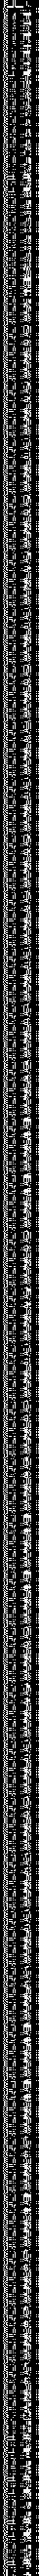

In [26]:
psml.show_arr(for_trcs_bits[0])

array([19,  0,  0, 28,  5], dtype=uint8)